In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [5]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")

In [6]:
Excel.sheet_names

['Hoja1', 'Voltaje', 'Exp_Voltaje_VS_Conteos', 'intensidad', 'Hoja2']

In [7]:
datos=pd.read_excel(Excel,sheet_name='Exp_Voltaje_VS_Conteos')

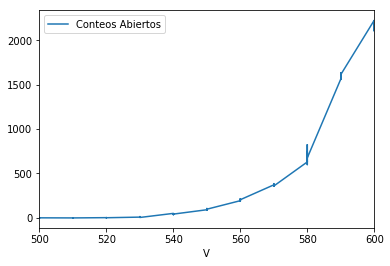

In [8]:
datos.plot(x="V",y="Conteos Abiertos",kind="line")

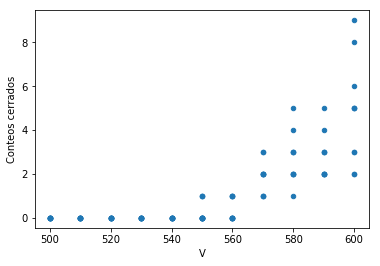

In [9]:
datos.plot(x="V",y="Conteos cerrados",kind="scatter")

In [10]:
STD_datos=datos.groupby("V").std()
STD_datos=STD_datos.reset_index()

In [11]:
Promedios_datos=datos.groupby("V").mean()
Promedios_datos=Promedios_datos.reset_index()

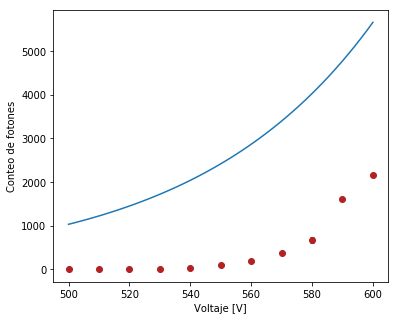

In [12]:
plt.figure(figsize=(6,5))
#plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
 #            color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
x=np.linspace(500,600)
plt.plot(x,0.2101*np.exp(0.017*x))
plt.show()

In [26]:
def model(x,a,b,c):
    return a*x**2+b*x+c
    #return a*np.exp(b*x)+c

In [27]:
x_obs=np.array(Promedios_datos["V"])/100
y_obs=np.array(Promedios_datos["Conteos Abiertos"])/100
sigma_y_obs=np.array(STD_datos["Conteos Abiertos"])/100

In [28]:
popt, pcov = curve_fit(model, x_obs, y_obs)

Text(0, 0.5, 'Conteo de fotones')

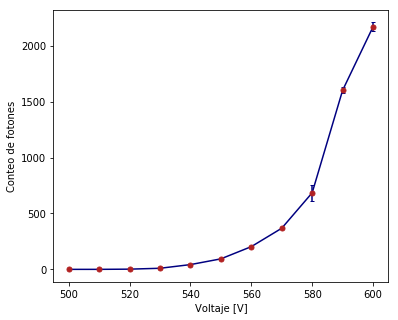

In [32]:
plt.figure(figsize=(6,5))
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
#plt.errorbar(x_obs,y_obs,yerr=sigma_y_obs,capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")